# 6.1 매개변수 갱신
## 6.1.2 확률적 경사 하강법(SGD)

In [ ]:
class SGD:
    def __init__(self, lr = 0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in grads.keys():
            params[key] -= self.lr * grads[key]

## 6.1.4 모멘텀(Momentum)

In [ ]:
class Momentum:
    def __init__(self, lr = 0.01, momentum = 0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def upgrade(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

## 6.1.5 AdaGrad

In [ ]:
class AdaGrad:
    def __init__(self, lr = 0.01):
        self.lr = lr
        self.h = None
        
    def upgrade(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / np.sqrt(self.h[key] + 1e-7)

# 6.2 가중치의 초깃값
## 6.2.2 은닉층의 활성화값 분포

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.normal(size = (node_num, node_num)) * 1
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

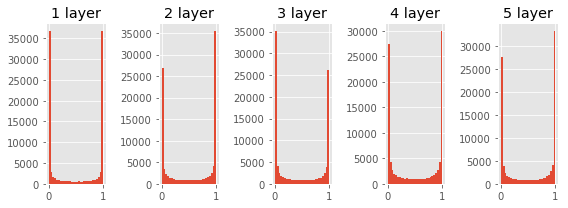

In [5]:
plt.figure(figsize = (8, 3))

for i, a in activations.items():
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i+1) + " layer")
    plt.hist(a.flatten(), 30, range = (0, 1))


plt.tight_layout()
plt.show()

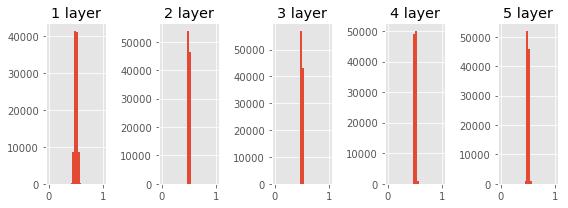

In [6]:
x = np.random.randn(1000, 100)

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.normal(size = (node_num, node_num)) * 0.01
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z
    
plt.figure(figsize = (8, 3))

for i, a in activations.items():
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i+1) + " layer")
    plt.hist(a.flatten(), 30, range = (0, 1))


plt.tight_layout()
plt.show()

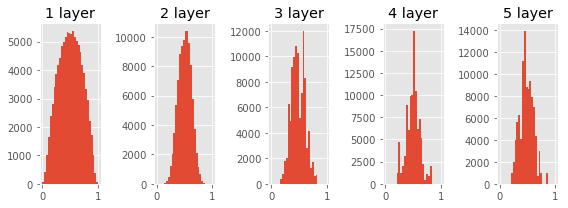

In [7]:
x = np.random.randn(1000, 100)

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.normal(size = (node_num, node_num)) / np.sqrt(node_num)
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z
    
plt.figure(figsize = (8, 3))

for i, a in activations.items():
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i+1) + " layer")
    plt.hist(a.flatten(), 30, range = (0, 1))


plt.tight_layout()
plt.show()

## 6.2.3 ReLU를 사용할 때의 가중치 초깃값

In [8]:
def relu(x):
    return np.where(x > 0, x, 0)

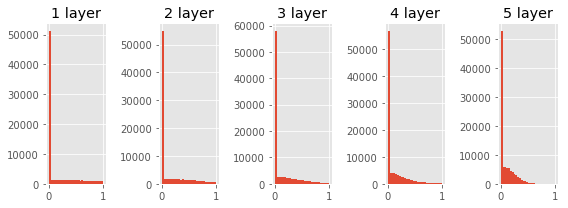

In [9]:
x = np.random.randn(1000, 100)

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.normal(size = (node_num, node_num)) / np.sqrt(node_num)
    a = np.dot(x, w)
    z = relu(a)
    activations[i] = z
    
plt.figure(figsize = (8, 3))

for i, a in activations.items():
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i+1) + " layer")
    plt.hist(a.flatten(), 30, range = (0, 1))

plt.tight_layout()
plt.show()

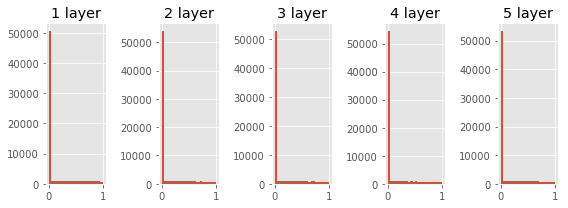

In [10]:
x = np.random.randn(1000, 100)

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.normal(size = (node_num, node_num)) / np.sqrt(node_num) * np.sqrt(2)
    a = np.dot(x, w)
    z = relu(a)
    activations[i] = z
    
plt.figure(figsize = (8, 3))

for i, a in activations.items():
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i+1) + " layer")
    plt.hist(a.flatten(), 30, range = (0, 1))


plt.tight_layout()
plt.show()

# 6.3 Batch Normalization
# 6.4 바른 학습을 위해
## 6.4.1 오버피팅
## 6.4.2 가중치 감소
## 6.4.3 드롭아웃

In [11]:
class Dropout:
    def __init__(self, dropout_ratio = 0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x, train_flag = True):
        if train_flag:
            self.mask = np.random.uniform(size = x.shape) > self.dropout_ratio
            return x * self.mask
        
        else:
            return x * (1 - self.dropout_ratio)
        
    def backward(self, dout):
        return dout * self.mask

# 6.5 적절한 하이퍼파라미터 값 찾기
## 6.5.1 검증 데이터
## 6.5.2 하이퍼파라미터 최적화

<font size = 14, color = 'red'><b><정리></b></font><br>
   <b> - 매개변수 갱신 방법: SGD, 모멘텀, AdaGrad, Adam <br>
       - 가중치 초깃값: Xavier 초깃값, He 초깃값 <br>
       - 배치 정규화 이용: 빠른 학습과 초깃값에 영향을 덜 받게 된다 <br>
       - 오버피팅 억제하는 정규화 기술: 가중치 감소, 드롭아웃 <br>
       - 하이퍼파라미터 값 탐색: 최적값이 존재할 법한 범위를 좁히면서 하는 것이 효과적 </b>